In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns

In [2]:
movies=pd.read_csv('my_movies.csv')
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [3]:
movies1=movies.iloc[:,5:15]
movies1

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [4]:
frequent_itemsets=apriori(movies1,min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [5]:
rules=association_rules(frequent_itemsets,metric="lift",min_threshold=.7)
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
196,"(Sixth Sense, Harry Potter1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
215,"(LOTR1, Green Mile)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
198,"(Harry Potter1, Green Mile)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
199,"(Sixth Sense, LOTR2)","(Harry Potter1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
201,"(LOTR2, Green Mile)","(Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
9,(LOTR2),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.800000
21,(Gladiator),(Green Mile),0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333
57,(Gladiator),"(Sixth Sense, Green Mile)",0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333
52,"(Sixth Sense, Green Mile)",(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000


In [6]:
import matplotlib.pyplot as plt

In [7]:
b=rules.corr()
b

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
antecedent support,1.000000,-0.005630,0.443418,-0.747406,-0.552832,-0.354424,-0.598748
consequent support,-0.005630,1.000000,0.443418,0.288815,-0.552832,-0.354424,-0.292035
support,0.443418,0.443418,1.000000,0.051707,-0.245659,0.267148,0.113678
confidence,-0.747406,0.288815,0.051707,1.000000,0.508401,0.465637,0.670297
lift,-0.552832,-0.552832,-0.245659,0.508401,1.000000,0.612422,0.798952
leverage,-0.354424,-0.354424,0.267148,0.465637,0.612422,1.000000,0.893895
conviction,-0.598748,-0.292035,0.113678,0.670297,0.798952,0.893895,1.000000


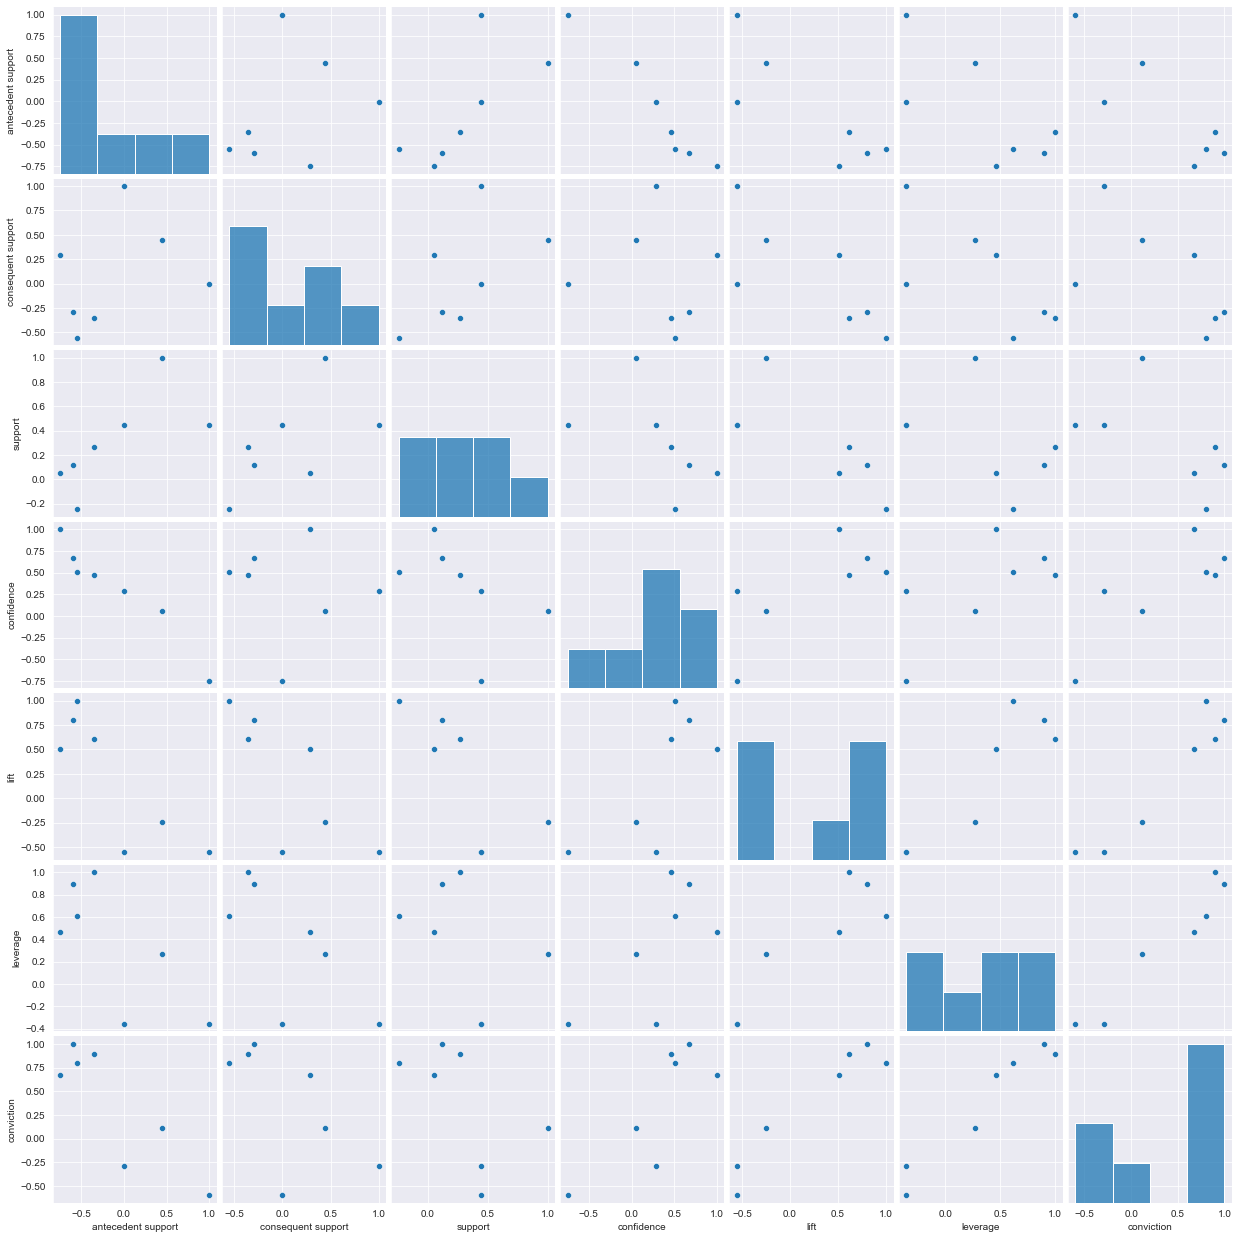

In [8]:
sns.set_style(style="darkgrid")
sns.pairplot(b)

# for diffrent values of confidence

In [9]:
rule1=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.1)
rule1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
245,(LOTR2),"(Sixth Sense, Harry Potter1, LOTR1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(LOTR1),"(Sixth Sense, Harry Potter1, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(Harry Potter1),"(Sixth Sense, LOTR2, LOTR1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
248,(Sixth Sense),"(Harry Potter1, LOTR2, LOTR1, Green Mile)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08


In [10]:
rule2=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.2)
rule2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
215,"(Sixth Sense, Green Mile)","(Harry Potter1, LOTR2, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
216,(LOTR2),"(Sixth Sense, Harry Potter1, LOTR1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
217,(LOTR1),"(Sixth Sense, Harry Potter1, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
218,(Harry Potter1),"(Sixth Sense, LOTR2, LOTR1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


In [11]:
# for confidence value greater than 0.4
rule3=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.3)
rule3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
212,"(Sixth Sense, Green Mile)","(Harry Potter1, LOTR2, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
213,(LOTR2),"(Sixth Sense, Harry Potter1, LOTR1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
214,(LOTR1),"(Sixth Sense, Harry Potter1, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
215,(Harry Potter1),"(Sixth Sense, LOTR2, LOTR1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


In [12]:
rule4=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.4)
rule4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
211,"(Sixth Sense, Green Mile)","(Harry Potter1, LOTR2, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
212,(LOTR2),"(Sixth Sense, Harry Potter1, LOTR1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
213,(LOTR1),"(Sixth Sense, Harry Potter1, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
214,(Harry Potter1),"(Sixth Sense, LOTR2, LOTR1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


In [13]:
rule5=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.5)
rule5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
211,"(Sixth Sense, Green Mile)","(Harry Potter1, LOTR2, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
212,(LOTR2),"(Sixth Sense, Harry Potter1, LOTR1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
213,(LOTR1),"(Sixth Sense, Harry Potter1, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
214,(Harry Potter1),"(Sixth Sense, LOTR2, LOTR1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


In [14]:
rule6=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.6)
rule6

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
129,"(Harry Potter1, LOTR1)","(Sixth Sense, LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
130,"(Sixth Sense, LOTR1)","(Harry Potter1, LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
131,"(LOTR1, Green Mile)","(Sixth Sense, Harry Potter1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
132,"(Sixth Sense, Harry Potter1)","(LOTR2, LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [15]:
rule7=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7)
rule7

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
...,...,...,...,...,...,...,...,...,...
124,"(Harry Potter1, LOTR1)","(Sixth Sense, LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
125,"(Sixth Sense, LOTR1)","(Harry Potter1, LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
126,"(LOTR1, Green Mile)","(Sixth Sense, Harry Potter1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
127,"(Sixth Sense, Harry Potter1)","(LOTR2, LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [16]:
rule8=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.8)
rule8

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
2,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
...,...,...,...,...,...,...,...,...,...
123,"(Harry Potter1, LOTR1)","(Sixth Sense, LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
124,"(Sixth Sense, LOTR1)","(Harry Potter1, LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
125,"(LOTR1, Green Mile)","(Sixth Sense, Harry Potter1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
126,"(Sixth Sense, Harry Potter1)","(LOTR2, LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [17]:
rule9=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.9)
rule9

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
3,(LOTR),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
4,(Braveheart),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
...,...,...,...,...,...,...,...,...,...
120,"(Harry Potter1, LOTR1)","(Sixth Sense, LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
121,"(Sixth Sense, LOTR1)","(Harry Potter1, LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
122,"(LOTR1, Green Mile)","(Sixth Sense, Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
123,"(Sixth Sense, Harry Potter1)","(LOTR2, LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf


In [18]:
rule10=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.95)
rule10

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
3,(LOTR),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
4,(Braveheart),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
...,...,...,...,...,...,...,...,...,...
120,"(Harry Potter1, LOTR1)","(Sixth Sense, LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
121,"(Sixth Sense, LOTR1)","(Harry Potter1, LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
122,"(LOTR1, Green Mile)","(Sixth Sense, Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
123,"(Sixth Sense, Harry Potter1)","(LOTR2, LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf


In [19]:
# hence from here we can analyse that we hae everyb single entry with confidence value less than 0.9

In [20]:
info={'rule':['rule1','rule2','rule3','rule4','rule5','rule6','rule7','rule8','rule9','rule10'],'counts':[rule1.confidence.count(),rule2.confidence.count(),rule3.confidence.count(),rule4.confidence.count(),rule5.confidence.count(),rule6.confidence.count(),rule7.confidence.count(),rule8.confidence.count(),rule9.confidence.count(),rule10.confidence.count()]}

In [21]:
count=pd.DataFrame(info)
count

,rule,counts
0,rule1,250
1,rule2,220
2,rule3,217
3,rule4,216
4,rule5,216
5,rule6,134
6,rule7,129
7,rule8,128
8,rule9,125
9,rule10,125


<AxesSubplot:xlabel='rule', ylabel='counts'>

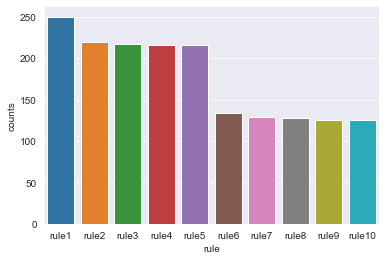

In [22]:
import seaborn as sns
sns.barplot(x='rule',y='counts',data=count)

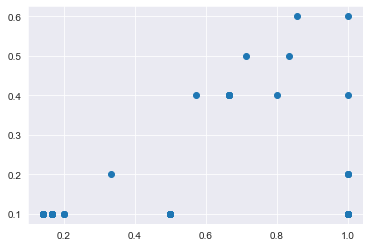

In [23]:
plt.scatter(rule1.confidence,rule1.support)

In [24]:
# hence from the given graph we can analyse that values of confidence are constant at every certain interval